<h1>Eksploracja Danych 2022 - Projekt</h1>

<h3>Autorzy: K. Jarek, P. Witek</h3>
<h3>Zbiór: "Concrete Data"</h3>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
plt.style.use('fivethirtyeight')

In [3]:
df = pd.read_excel ("Concrete_Data.xls")

In [4]:
df.head(30)

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.029847
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.698299
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.447770
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.854291
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.289790


In [5]:
df.rename(columns={'Cement (component 1)(kg in a m^3 mixture)': 'Cement',
                   'Blast Furnace Slag (component 2)(kg in a m^3 mixture)': 'Blast Furnace Slag',
                   'Fly Ash (component 3)(kg in a m^3 mixture)': 'Fly Ash',
                   'Water  (component 4)(kg in a m^3 mixture)': 'Water',
                   'Superplasticizer (component 5)(kg in a m^3 mixture)': 'Superplasticizer',
                   'Coarse Aggregate  (component 6)(kg in a m^3 mixture)': 'Coarse Aggregate',
                   'Fine Aggregate (component 7)(kg in a m^3 mixture)': 'Fine Aggregate', 
                   'Age (day)': 'Age',
                   'Concrete compressive strength(MPa, megapascals) ': 'Concrete compressive strength'},
                   inplace=True)
df.columns

Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age',
       'Concrete compressive strength'],
      dtype='object')

In [6]:
df.dtypes

Cement                           float64
Blast Furnace Slag               float64
Fly Ash                          float64
Water                            float64
Superplasticizer                 float64
Coarse Aggregate                 float64
Fine Aggregate                   float64
Age                                int64
Concrete compressive strength    float64
dtype: object

In [7]:
df.isnull().sum()

Cement                           0
Blast Furnace Slag               0
Fly Ash                          0
Water                            0
Superplasticizer                 0
Coarse Aggregate                 0
Fine Aggregate                   0
Age                              0
Concrete compressive strength    0
dtype: int64

In [8]:
df.shape

(1030, 9)

In [9]:
df.drop_duplicates(inplace=True)
df.head(10)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.029847
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.698299
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.447770
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.854291
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.289790


In [10]:
df.reset_index(inplace=True,drop=True)

In [11]:
print('Shape:', df.shape)
df.tail()

Shape: (1005, 9)


,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
1000,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1001,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1002,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1003,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036
1004,260.9,100.5,78.3,200.6,8.6,864.5,761.5,28,32.401235


In [12]:
df.describe(include='all')

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
count,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000
mean,278.629055,72.043134,55.535075,182.074378,6.031647,974.376468,772.686617,45.856716,35.250273
std,104.345003,86.170555,64.207448,21.340740,5.919559,77.579534,80.339851,63.734692,16.284808
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,190.680000,0.000000,0.000000,166.610000,0.000000,932.000000,724.300000,7.000000,23.523542
50%,265.000000,20.000000,0.000000,185.700000,6.100000,968.000000,780.000000,28.000000,33.798114
75%,349.000000,142.500000,118.270000,192.940000,10.000000,1031.000000,822.200000,56.000000,44.868340
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [13]:
df.median()

Cement                           265.000000
Blast Furnace Slag                20.000000
Fly Ash                            0.000000
Water                            185.700000
Superplasticizer                   6.100000
Coarse Aggregate                 968.000000
Fine Aggregate                   780.000000
Age                               28.000000
Concrete compressive strength     33.798114
dtype: float64

In [14]:
df.mode()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,251.37,0.0,0.0,192.0,0.0,932.0,594.0,28,31.350474


In [15]:
df.var()

Cement                           10887.879601
Blast Furnace Slag                7425.364576
Fly Ash                           4122.596436
Water                              455.427169
Superplasticizer                    35.041179
Coarse Aggregate                  6018.584052
Fine Aggregate                    6454.491667
Age                               4062.110923
Concrete compressive strength      265.194960
dtype: float64

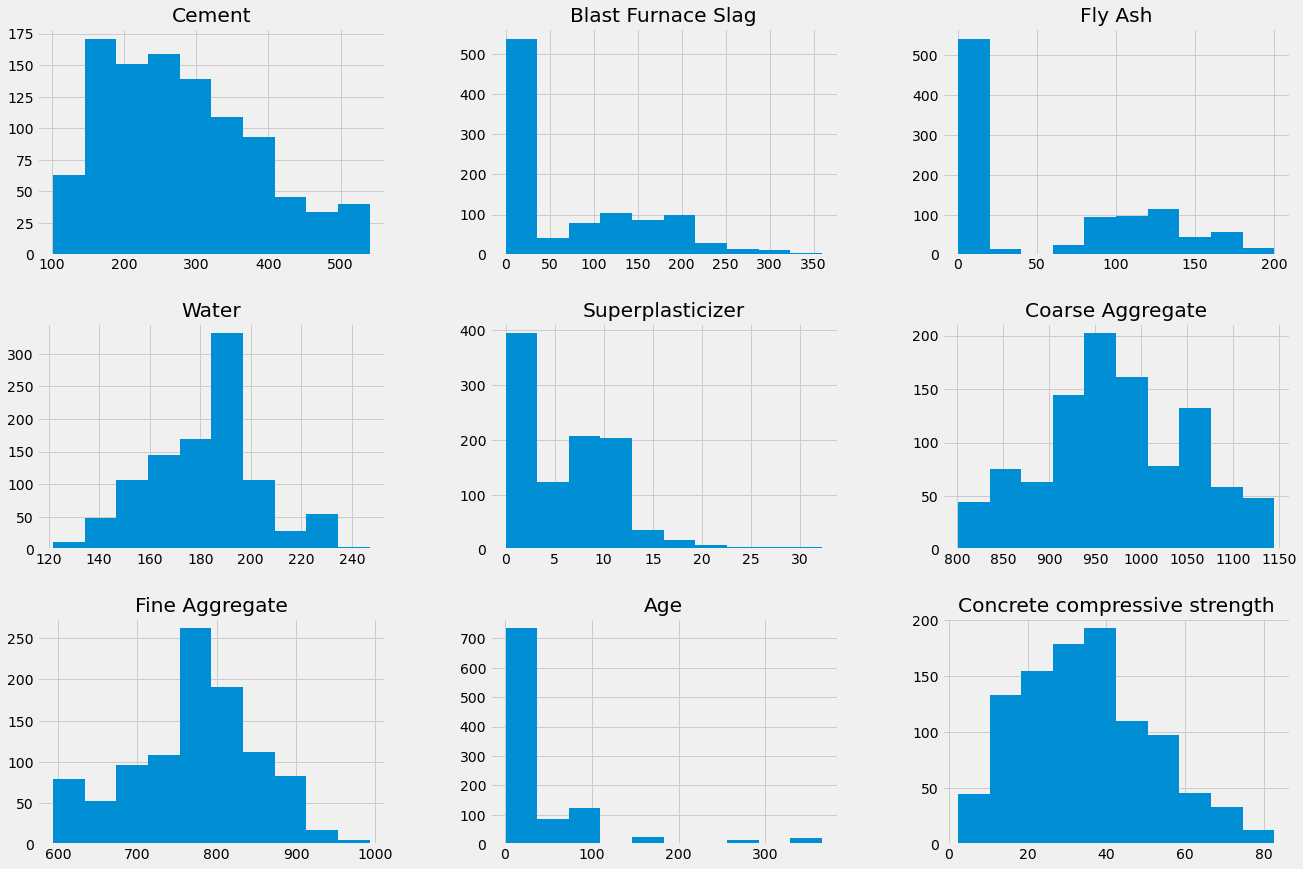

In [16]:
plt.rcParams['figure.figsize'] = [20, 14]
hist = df.hist()

In [17]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats

In [18]:
formula  = "Q('Concrete compressive strength') ~ Cement + Q('Blast Furnace Slag') + Q('Fly Ash')"
formula += " + Water + Superplasticizer + Q('Coarse Aggregate') + Q('Fine Aggregate') + Age"
formula += " + Q('Concrete compressive strength')"

anova_model = smf.ols(formula=formula, data=df).fit()
anova_table = sm.stats.anova_lm(anova_model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
Cement,1.961290e-25,1.0,5.894377e+00,0.015366
Q('Blast Furnace Slag'),1.038738e-25,1.0,3.121780e+00,0.077559
Q('Fly Ash'),1.877015e-26,1.0,5.641103e-01,0.452786
Water,5.595786e-27,1.0,1.681734e-01,0.681829
Superplasticizer,3.094751e-28,1.0,9.300832e-03,0.923190
Q('Coarse Aggregate'),8.901093e-26,1.0,2.675097e+00,0.102245
Q('Fine Aggregate'),6.961460e-26,1.0,2.092168e+00,0.148371
Age,2.699828e-25,1.0,8.113948e+00,0.004483
Q('Concrete compressive strength'),1.054841e+05,1.0,3.170174e+30,0.000000
Residual,3.310754e-23,995.0,NaN,NaN


In [19]:
anova_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     Q('Concrete compressive strength')   R-squared:                       1.000
Model:                                            OLS   Adj. R-squared:                  1.000
Method:                                 Least Squares   F-statistic:                 8.891e+29
Date:                                Fri, 27 May 2022   Prob (F-statistic):               0.00
Time:                                        17:45:58   Log-Likelihood:                 28058.
No. Observations:                                1005   AIC:                        -5.610e+04
Df Residuals:                                     995   BIC:                        -5.605e+04
Df Model:                                           9                                         
Covariance Type:                            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                          -2.984e-13   4.68e-13     -0.637      0.524   -1.22e-12    6.21e-13
Cement                              -3.99e-16   1.64e-16     -2.428      0.015   -7.21e-16   -7.65e-17
Q('Blast Furnace Slag')             3.331e-16   1.89e-16      1.767      0.078   -3.69e-17    7.03e-16
Q('Fly Ash')                          1.7e-16   2.26e-16      0.751      0.453   -2.74e-16    6.14e-16
Water                               2.914e-16   7.11e-16      0.410      0.682    -1.1e-15    1.69e-15
Superplasticizer                    1.596e-16   1.65e-15      0.096      0.923   -3.09e-15    3.41e-15
Q('Coarse Aggregate')               2.706e-16   1.65e-16      1.636      0.102   -5.41e-17    5.95e-16
Q('Fine Aggregate')                 2.741e-16   1.89e-16      1.446      0.148   -9.78e-17    6.46e-16
Age                                -3.261e-16   1.14e-16     -2.848      0.004   -5.51e-16   -1.01e-16
Q('Concrete compressive strength')     1.0000   5.62e-16   1.78e+15      0.000       1.000       1.000
==============================================================================
Omnibus:                       72.445   Durbin-Watson:                   0.104
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               87.026
Skew:                           0.717   Prob(JB):                     1.27e-19
Kurtosis:                       3.141   Cond. No.                     1.05e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
df.corr()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
Cement,1.000000,-0.303301,-0.385618,-0.056583,0.061296,-0.086212,-0.245379,0.086349,0.488283
Blast Furnace Slag,-0.303301,1.000000,-0.312342,0.130295,0.019902,-0.277558,-0.289676,-0.042759,0.103370
Fly Ash,-0.385618,-0.312342,1.000000,-0.283372,0.414055,-0.026485,0.090229,-0.158940,-0.080648
Water,-0.056583,0.130295,-0.283372,1.000000,-0.646875,-0.212495,-0.444888,0.279269,-0.269606
Superplasticizer,0.061296,0.019902,0.414055,-0.646875,1.000000,-0.242031,0.207794,-0.194094,0.344225
Coarse Aggregate,-0.086212,-0.277558,-0.026485,-0.212495,-0.242031,1.000000,-0.162212,-0.005263,-0.144710
Fine Aggregate,-0.245379,-0.289676,0.090229,-0.444888,0.207794,-0.162212,1.000000,-0.156572,-0.186457
Age,0.086349,-0.042759,-0.158940,0.279269,-0.194094,-0.005263,-0.156572,1.000000,0.337371
Concrete compressive strength,0.488283,0.103370,-0.080648,-0.269606,0.344225,-0.144710,-0.186457,0.337371,1.000000


In [21]:
chisquare_stats = stats.chisquare(df, f_exp=None, ddof=0, axis=0)
print('Statistics:', chisquare_stats.statistic, '\np-value:', chisquare_stats.pvalue)

Statistics: [ 39232.91894428 103480.58984564  74531.03916632   2511.33016344
   5832.7924004    6201.56437323   8386.72430923  88937.01262856
   7553.29585965] 
p-value: [0.00000000e+000 0.00000000e+000 0.00000000e+000 4.38388802e-130
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000]


<AxesSubplot:>

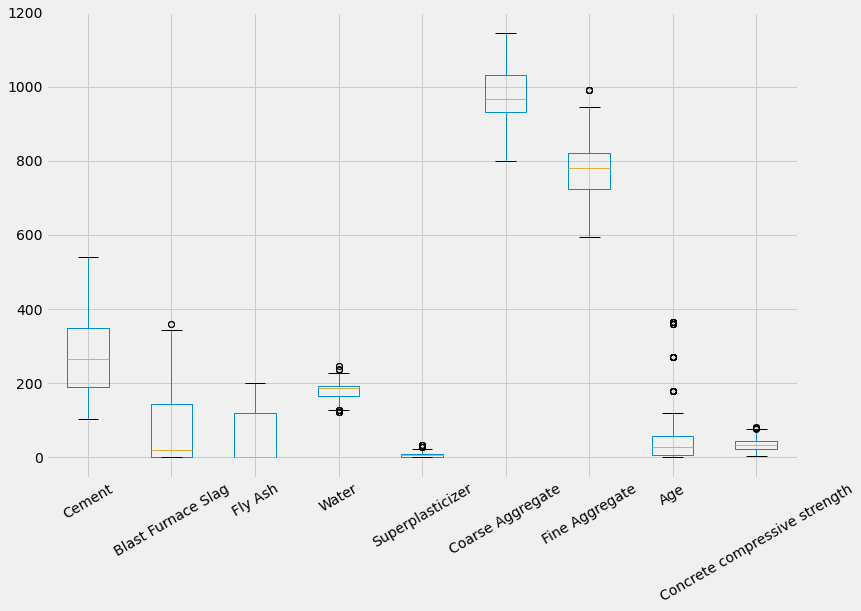

In [22]:
# dla wszystkich zmiennych ilościowych z hipotez
df.boxplot(rot=30, figsize=(12, 8))

In [23]:
# normality test
shapiro_stat, shapiro_p = stats.shapiro(df[:-1])
print('Statistics: %f, p-value: %f' % (shapiro_stat, shapiro_p))

Statistics: 0.749661, p-value: 0.000000


/Users/krzysiu/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


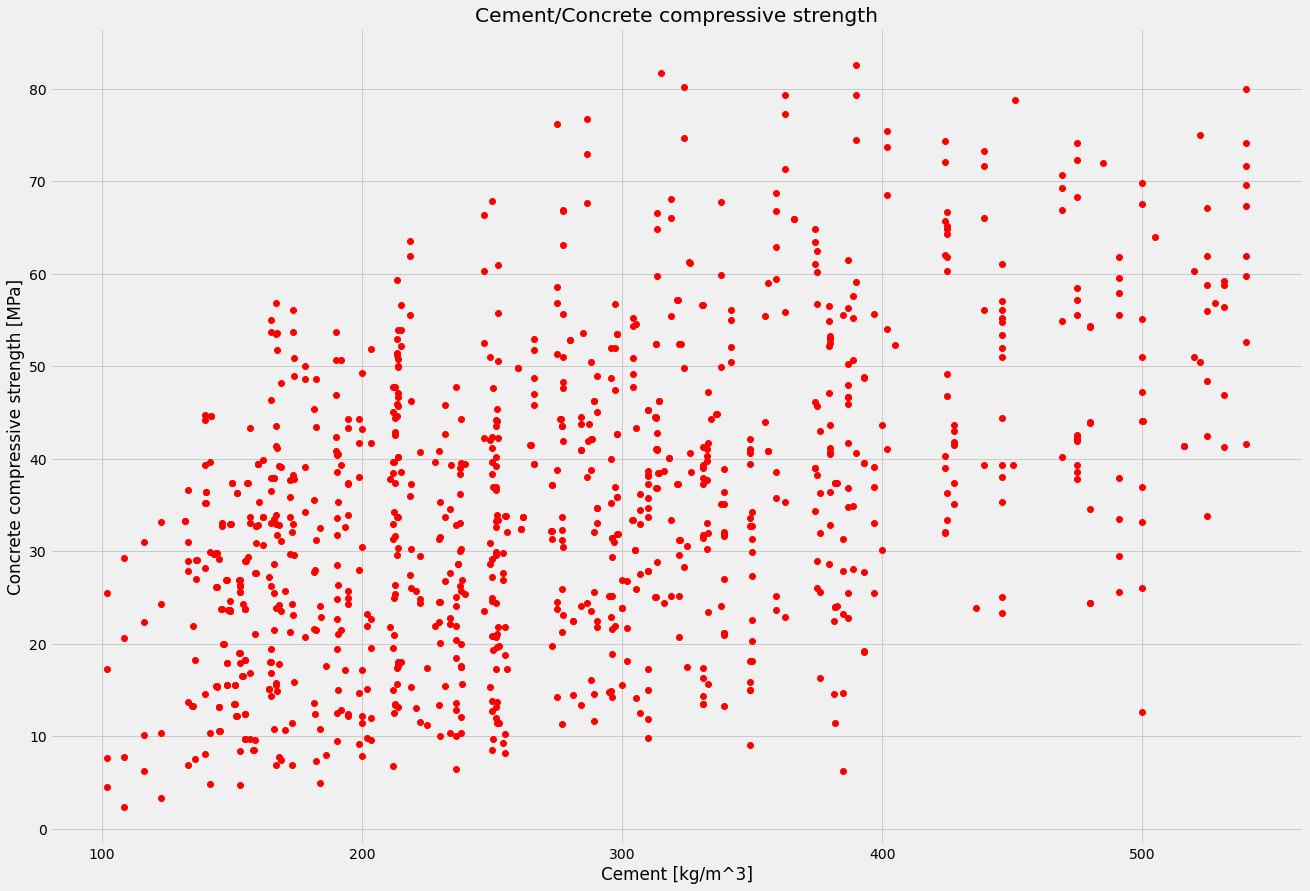

In [24]:
plt.plot(df['Cement'], df['Concrete compressive strength'], 'ro')
plt.xlabel('Cement [kg/m^3]')
plt.ylabel('Concrete compressive strength [MPa]')
plt.title('Cement/Concrete compressive strength')

plt.show()

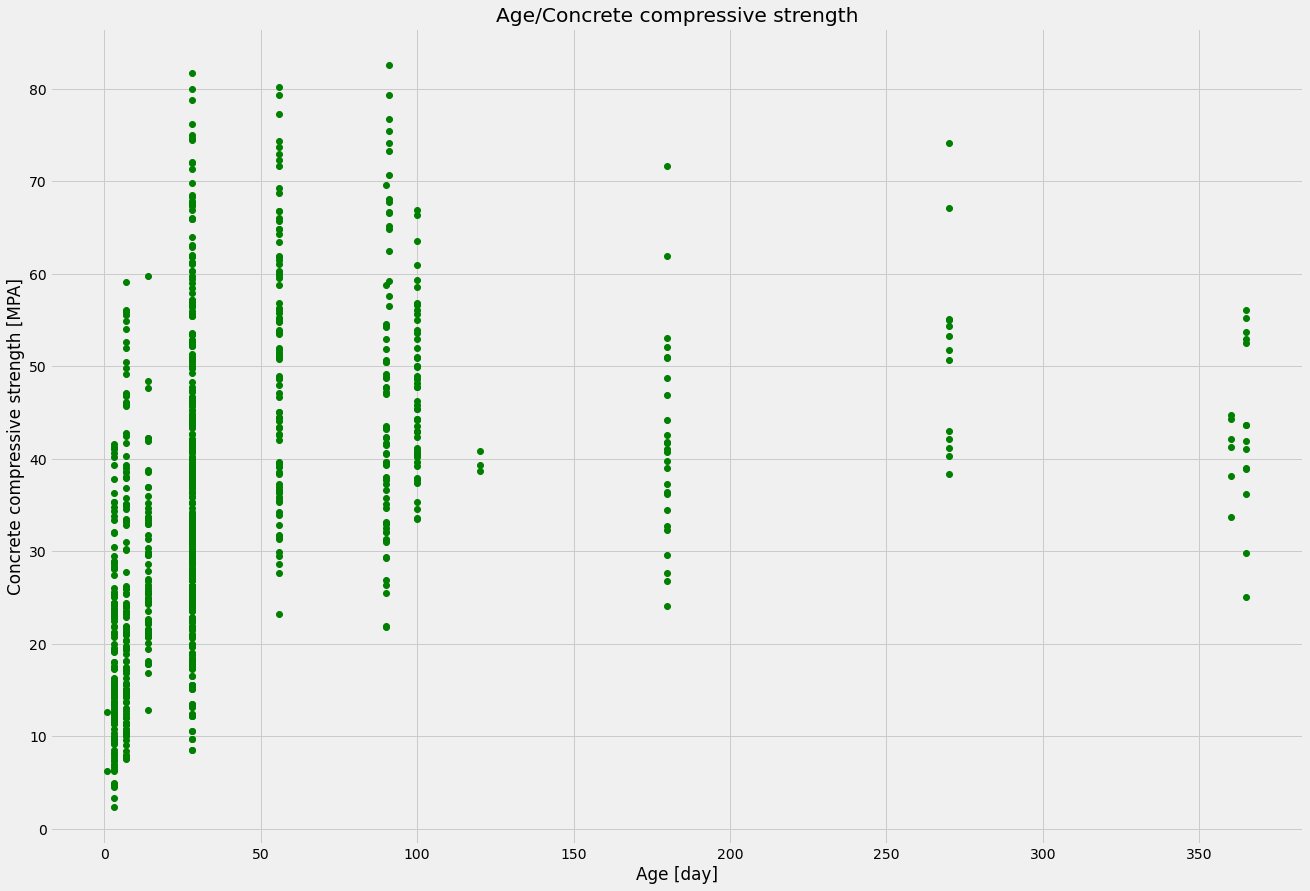

In [25]:
plt.plot(df['Age'], df['Concrete compressive strength'], 'go')
plt.xlabel('Age [day]')
plt.ylabel('Concrete compressive strength [MPA]')
plt.title('Age/Concrete compressive strength')

plt.show()

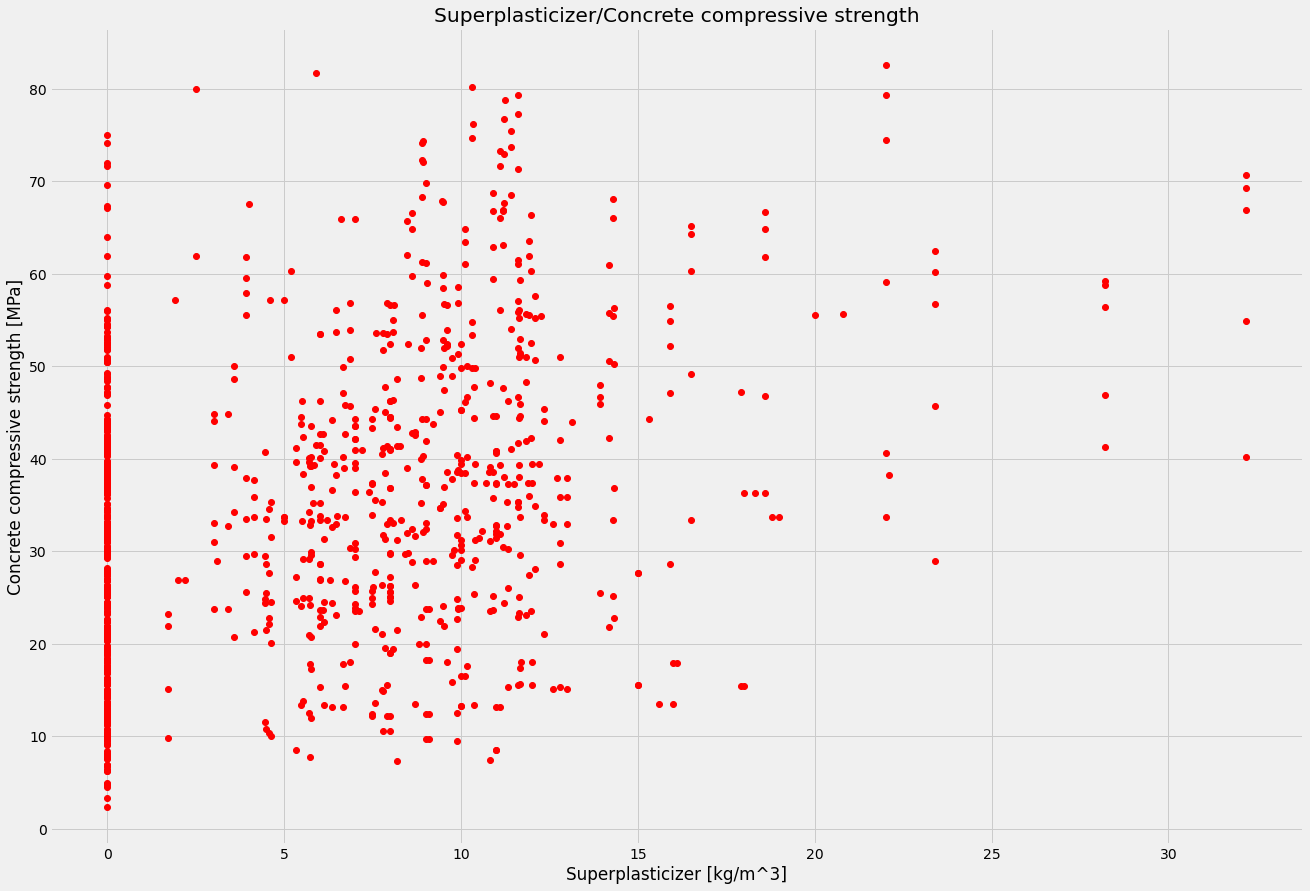

In [26]:
plt.plot(df['Superplasticizer'], df['Concrete compressive strength'], 'ro')
plt.xlabel('Superplasticizer [kg/m^3]')
plt.ylabel('Concrete compressive strength [MPa]')
plt.title('Superplasticizer/Concrete compressive strength')

plt.show()

In [27]:
### Decision Tree Classifier ###

In [28]:
### Clustering ###

In [29]:
### Artificial Neural Network ###

In [30]:
### Random Forest ###